In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from retinaface import RetinaFace
import os

In [ ]:
path = "faces/"
images = os.listdir(path)

In [ ]:
print(len(images))

In [ ]:
faceDetectionContainer = []
for i in range(0,len(images)):
    tempImg = cv2.imread(f"{path}{images[i]}")
    tempImg = cv2.cvtColor(tempImg, cv2.COLOR_BGR2RGB)
    faceDetectionContainer.append(RetinaFace.detect_faces(tempImg))

In [ ]:
print(faceDetectionContainer)

In [ ]:
import convolution_func_from_scratch as conv

In [174]:
identity_kernel = np.array([[0,0,0],[0,1,0], [0,0,0]])
left_sobel = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
blur_kernel = np.array([[1/16, 1/8 , 1/16], [1/16, 1/4, 1/16], [1/16, 1/8, 1/16]])
random_kernel = np.random.randint(-5,7, size=(3,3))

In [ ]:
test_image = cv2.imread(f"{path}{images[3]}")
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

In [ ]:
imgUnderIdentityKernel = conv.applyConvOnImage(test_image, identity_kernel)
BluredImag = conv.applyConvOnImage(test_image, blur_kernel)
leftSobeled = conv.applyConvOnImage(test_image, left_sobel)

In [175]:
randomlyAlteredImg = conv.applyConvOnImage(test_image, random_kernel)

In [ ]:
plt.imshow(test_image)

In [ ]:
plt.imshow(imgUnderIdentityKernel)

In [ ]:
plt.imshow(leftSobeled)

In [ ]:
plt.imshow(BluredImag)

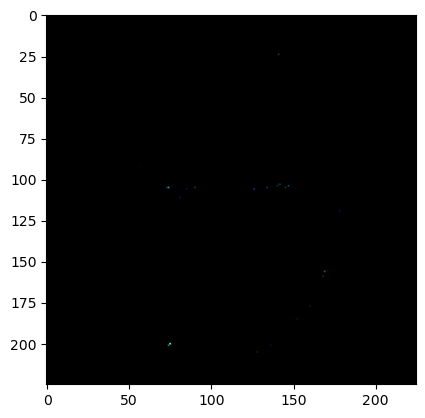

In [176]:
plt.imshow(randomlyAlteredImg)